In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [2]:
train_path = 'UNSW_NB15_training-set.parquet'
test_path =  'UNSW_NB15_testing-set.parquet'

In [3]:
train_data = pd.read_parquet(train_path)
test_data = pd.read_parquet(test_path)

In [ ]:
print("Information of Training Data: ")
print(train_data.info())

In [ ]:
print("Features of the dataset: ")
columns_name = train_data.columns
print(columns_name)

In [ ]:
print(train_data['attack_cat'])
print(train_data['attack_cat'].cat.categories)

In [ ]:
print("Null values in the features: ")
print(train_data.isnull().sum())

In [ ]:
#preprocessing
print("Statistics of the dataset: ")
print(train_data.describe)

Number of attacks:  114332
Attack distribution: 
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis              0
Backdoor              0
Shellcode             0
Worms                 0
Name: count, dtype: int64


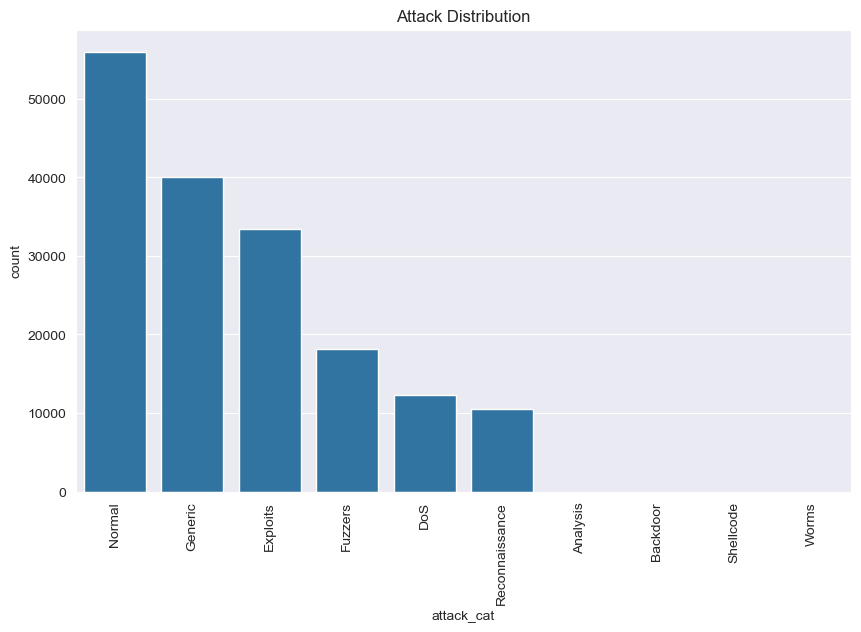

In [22]:
print("Number of attacks: ", train_data['label'].value_counts()[1])
print("Attack distribution: ")
print(train_data['attack_cat'].value_counts())
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='attack_cat', order=train_data['attack_cat'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Attack Distribution")
plt.show()

In [4]:
train_data = train_data[~train_data['attack_cat'].isin(['Analysis', 'Backdoor', 'Shellcode', 'Worms'])]

In [ ]:
## Description of the categorical columns
print("Protocols: \n", train_data['proto'].cat.categories)
print("Services: \n", train_data['service'].cat.categories)
print("States: \n", train_data['state'].cat.categories)

In [ ]:
##knowing the distributions of each feature
## protocols
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='proto', order=train_data['proto'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Protocol Distribution")
plt.show()


## Services
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='service', order=train_data['service'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("service Distribution")
plt.show()

##States
plt.figure(figsize=(10,6))
sns.countplot(data=train_data, x ='state', order=train_data['state'].value_counts().index)
plt.xticks(rotation = 90)
plt.title("State Distribution")
plt.show()

In [ ]:
## Attack happened under which protocol
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'proto', y = 'label')
plt.xticks(rotation = 90)
plt.title("Protocol Attack distribution")
plt.show()

## service under which frequent attacks are occuring
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'service', y = 'label')
plt.xticks(rotation = 90)
plt.title("Service Attack distribution")
plt.show()

#states in which attacks happened
plt.figure(figsize=(20,20))
sns.jointplot(data=train_data, x = 'state', y = 'label')
plt.xticks(rotation = 90)
plt.title("State Attack distribution")
plt.show()

In [23]:
print(train_data.head())

        dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087486   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473373   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373825   

          sload  ...  trans_depth  response_body_len  ct_src_dport_ltm  \
0  14158.942383  ...            0                  0                 1   
1   8395.112305  ...            0                  0                 1   
2   1572.271851  ...            0                  0                 1   
3   2740.178955  ...            0                  0                 1   
4   8561.499023  ...            0                  0                 2   

   ct_dst_sport_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                 1            

In [ ]:
print(train_data['attack_cat'])
prediction = 6
# original_category = label_encoder.inverse_transform([prediction])[0]
# print(original_category)

In [5]:
label_encoder = LabelEncoder()
train_data['attack_cat'] = label_encoder.fit_transform(train_data['attack_cat'])
train_data['proto'] = label_encoder.fit_transform(train_data['proto'])
train_data['service'] = label_encoder.fit_transform(train_data['service'])
train_data['state'] = label_encoder.fit_transform(train_data['state'])

In [6]:
test_data['attack_cat'] = label_encoder.fit_transform(test_data['attack_cat'])
test_data['proto'] = label_encoder.fit_transform(test_data['proto'])
test_data['service'] = label_encoder.fit_transform(test_data['service'])
test_data['state'] = label_encoder.fit_transform(test_data['state'])

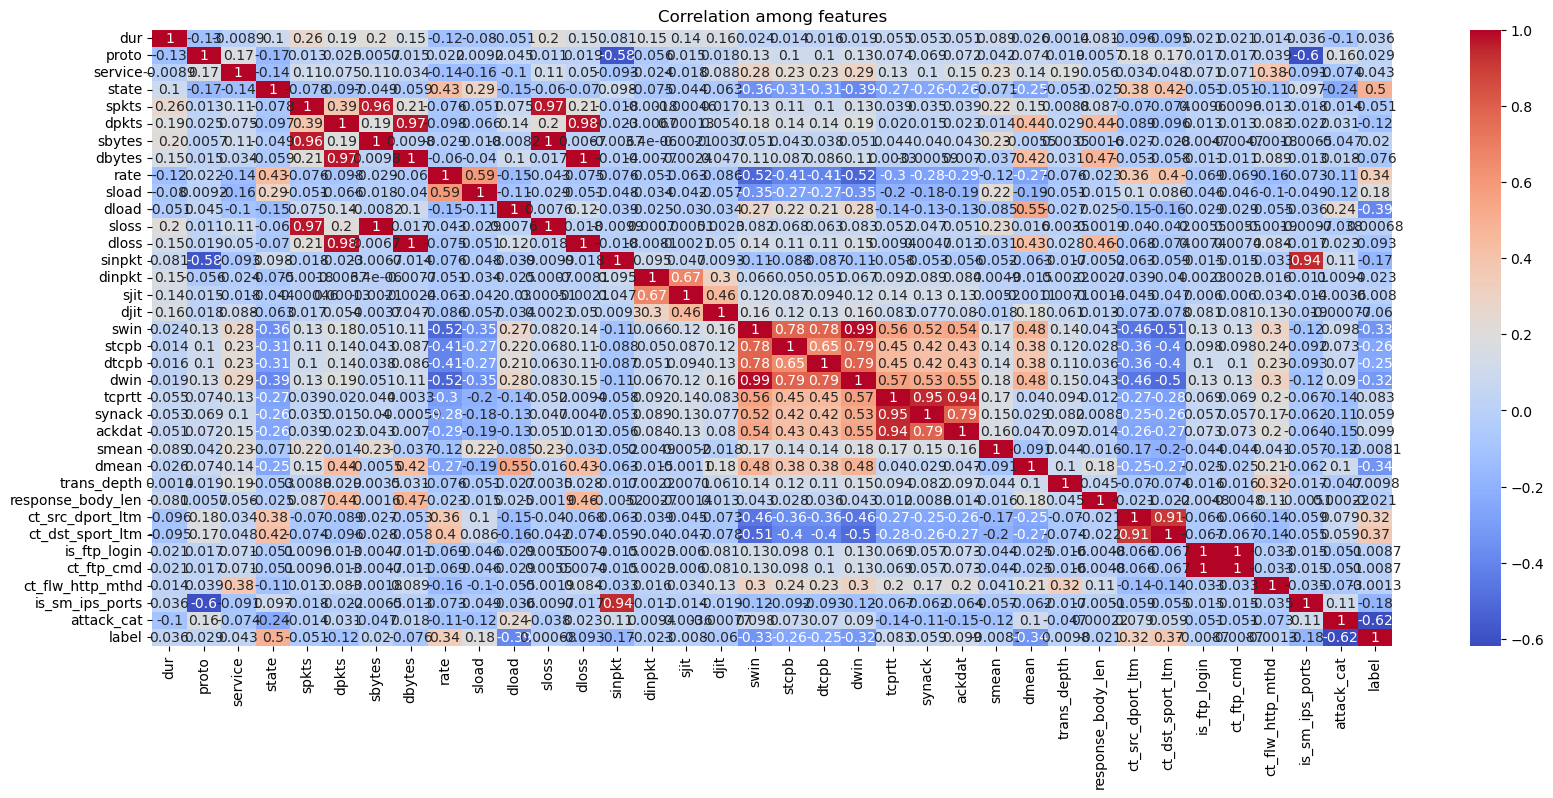

In [7]:
numerical_features = train_data.select_dtypes(include = [np.number]).columns
numerical_data = train_data[numerical_features]

cor_mat = numerical_data.corr()
#How numeric features are correlated with each other
plt.figure(figsize=(20,8))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.xticks(rotation = 90)
plt.title("Correlation among features")
plt.show()

In [8]:
numerical_features1 = test_data.select_dtypes(include = [np.number]).columns
numerical_data1 = test_data[numerical_features1]

In [41]:
print(numerical_data)

             dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0       0.121478    113        0      2      6      4     258     172   
1       0.649902    113        0      2     14     38     734   42014   
2       1.623129    113        0      2      8     16     364   13186   
3       1.681642    113        3      2     12     12     628     770   
4       0.449454    113        0      2     10      6     534     268   
...          ...    ...      ...    ...    ...    ...     ...     ...   
175335  0.000006    119        2      3      2      0     114       0   
175336  0.000009    119        2      3      2      0     114       0   
175338  0.000009    119        2      3      2      0     114       0   
175339  0.000009    119        2      3      2      0     114       0   
175340  0.000009    119        2      3      2      0     114       0   

                 rate         sload  ...  trans_depth  response_body_len  \
0           74.087486  1.415894e+04  ...       

In [9]:
X = numerical_data.drop(columns=['label', 'attack_cat'])
y = numerical_data['attack_cat']

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [10]:
X_t = numerical_data1.drop(columns=['label', 'attack_cat'])
y_t = numerical_data1['attack_cat']

X_sc_test = scaler.fit_transform(X_t)

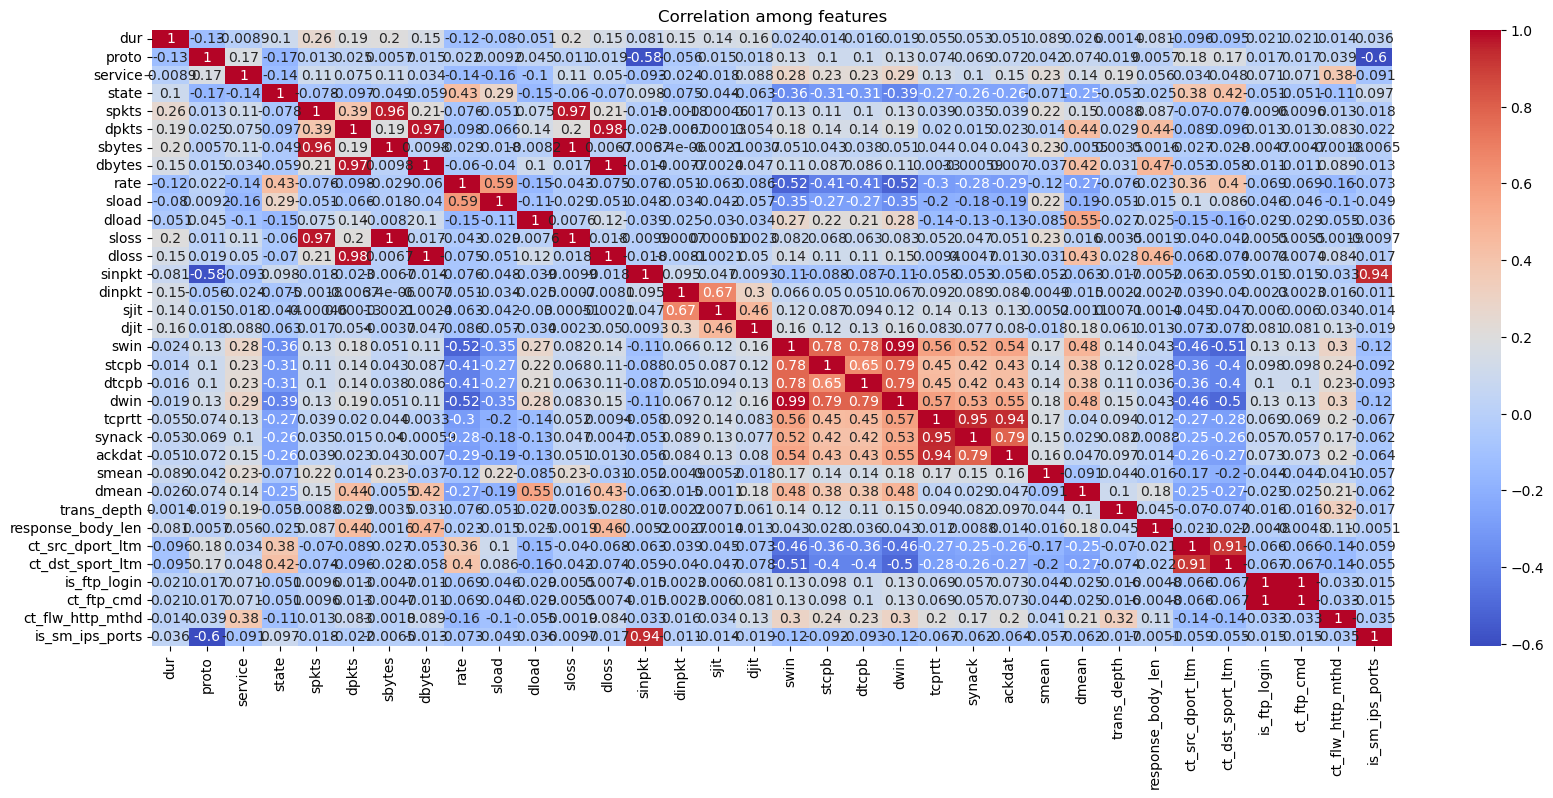

In [11]:
corr_mat = X.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.xticks(rotation = 90)
plt.title("Correlation among features")
plt.show()

In [12]:
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_sc)
X_test = pca.transform(X_sc_test)

print(f"Number of components retained: {pca.n_components_}")

Number of components retained: 16


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=23)
model.fit(X_train,y)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_t, y_pred))
print(classification_report(y_t,y_pred))

Accuracy: 0.03195598309284361
              precision    recall  f1-score   support

           0       0.04      0.05      0.05       677
           1       0.02      0.51      0.03       583
           2       0.07      0.34      0.12      4089
           3       0.00      0.00      0.00     11132
           4       0.04      0.14      0.06      6062
           5       0.00      0.00      0.00     18871
           6       0.00      0.00      0.00     37000
           7       0.00      0.00      0.00      3496
           8       0.00      0.00      0.00       378
           9       0.00      0.00      0.00        44

    accuracy                           0.03     82332
   macro avg       0.02      0.10      0.03     82332
weighted avg       0.01      0.03      0.01     82332



d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


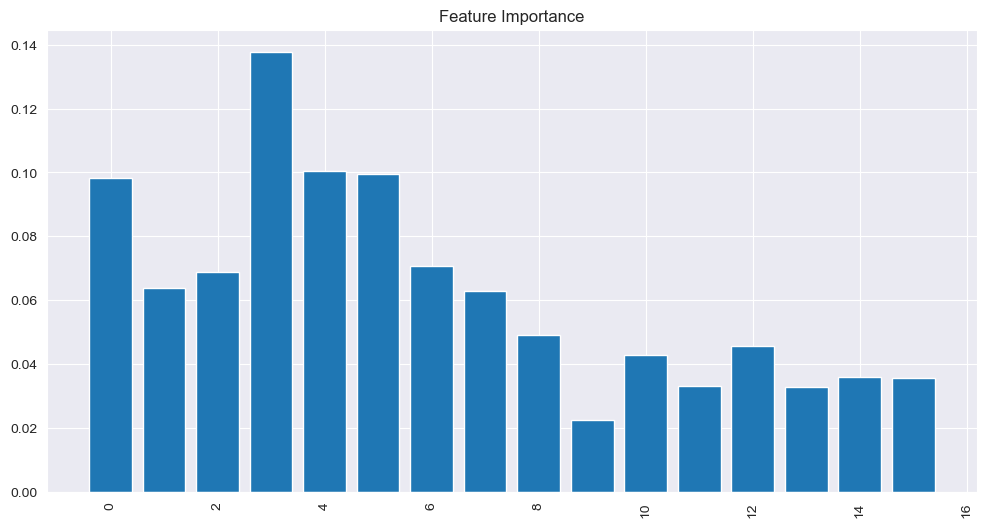

In [ ]:
importances = model.feature_importances_
feature_names = np.arange(len(importances))

plt.figure(figsize=(12, 6))
plt.bar(feature_names, importances)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show() 